<a href="https://colab.research.google.com/github/UmeshChandra05/AI-ML-Lab/blob/main/AI_ML_L05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
d = df.describe(percentiles = [0.25, 0.5, 0.75, 0.90])
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Bar Plot of Count of Numeric Features')

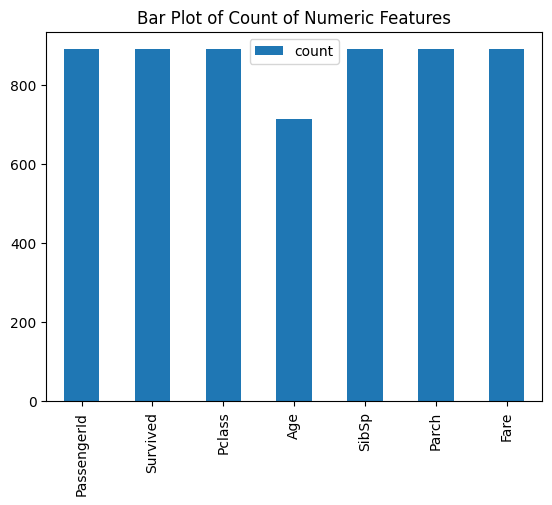

In [ ]:
DT = d.T
DT.plot.bar(y = 'count')
plt.title("Bar Plot of Count of Numeric Features")

<ipython-input-20-4558b4448fb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = df, palette = 'RdBu_r')


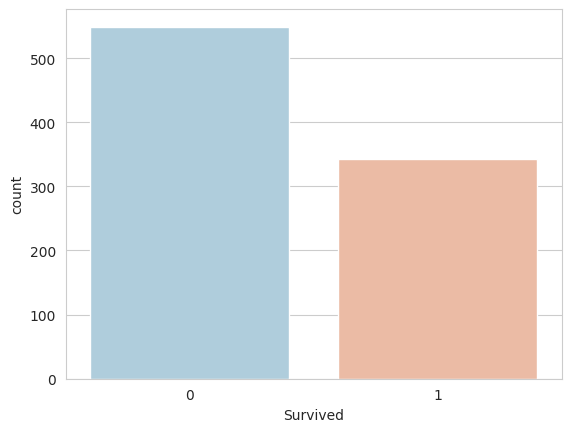

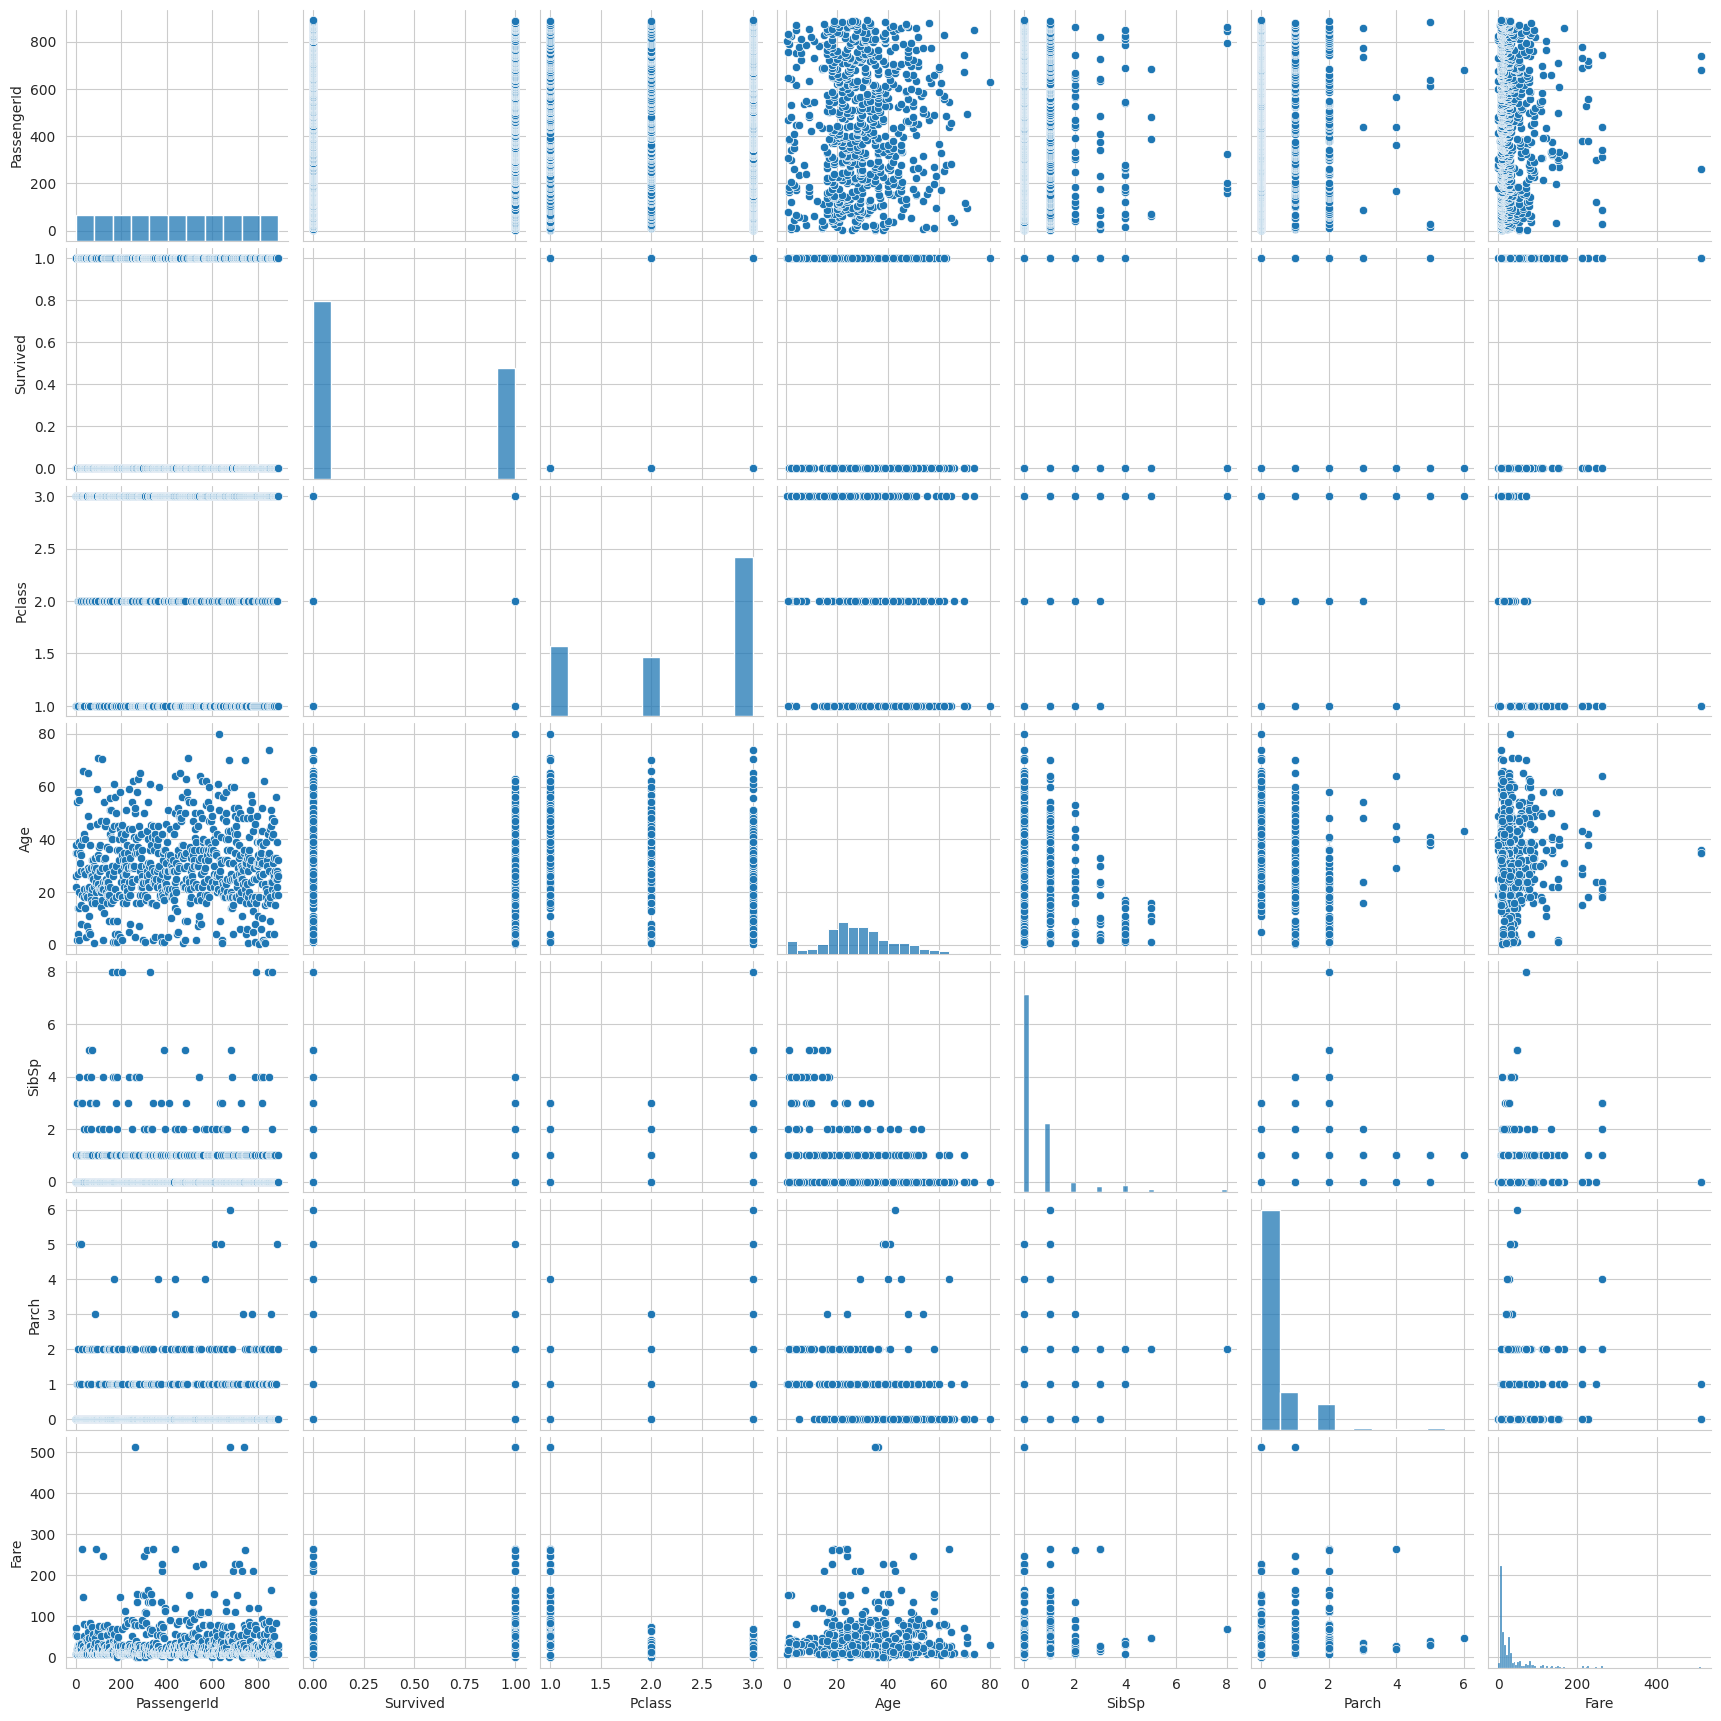

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, palette = 'RdBu_r')
sns.pairplot(df)

<Axes: xlabel='Survived', ylabel='count'>

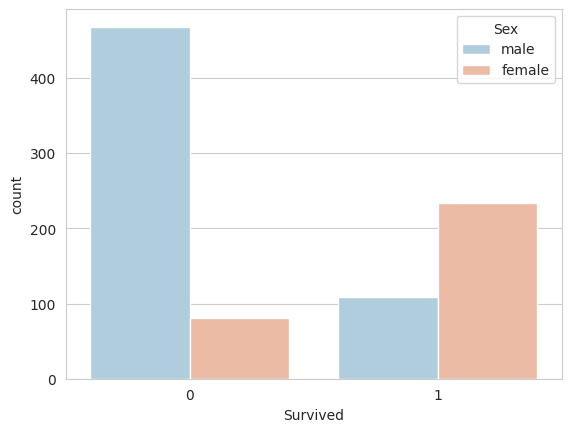

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

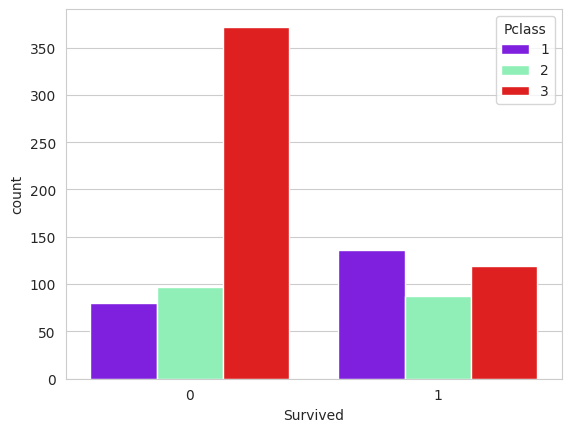

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'rainbow')

<ipython-input-25-59e1fbd3cf56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = f_class_survived, palette = 'rainbow')


Text(0.5, 1.0, 'Fraction of Passengers survived by class')

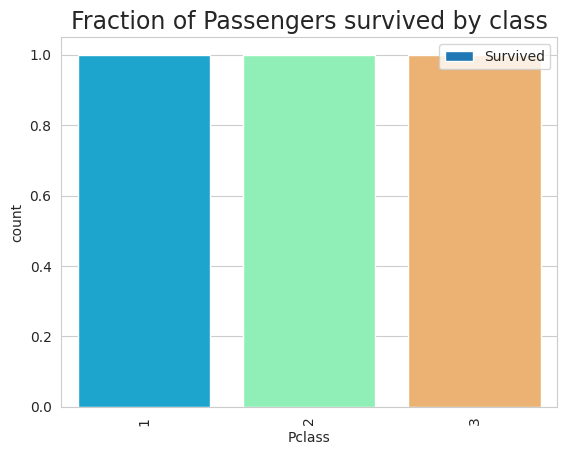

In [ ]:
f_class_survived = df.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y = 'Survived')
sns.countplot(x = 'Survived', data = f_class_survived, palette = 'rainbow')
plt.title("Fraction of Passengers survived by class", fontsize = 17)

<Axes: xlabel='Survived', ylabel='count'>

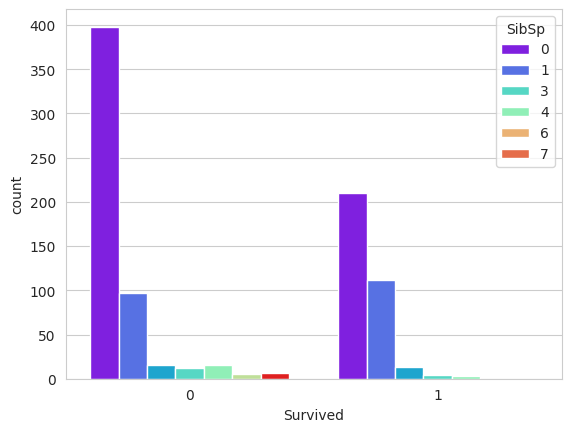

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'SibSp', data = df, palette = 'rainbow')

In [ ]:
# df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
# c = df.dropna(inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
df.drop(['Sex','Embarked'],axis = 1, inplace = True)
df = pd.concat([df, sex, embark], axis = 1)
df.head()

KeyError: "['Sex', 'Embarked'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis= 1), df['Survived'], test_size = 0.30, random_state = 111)

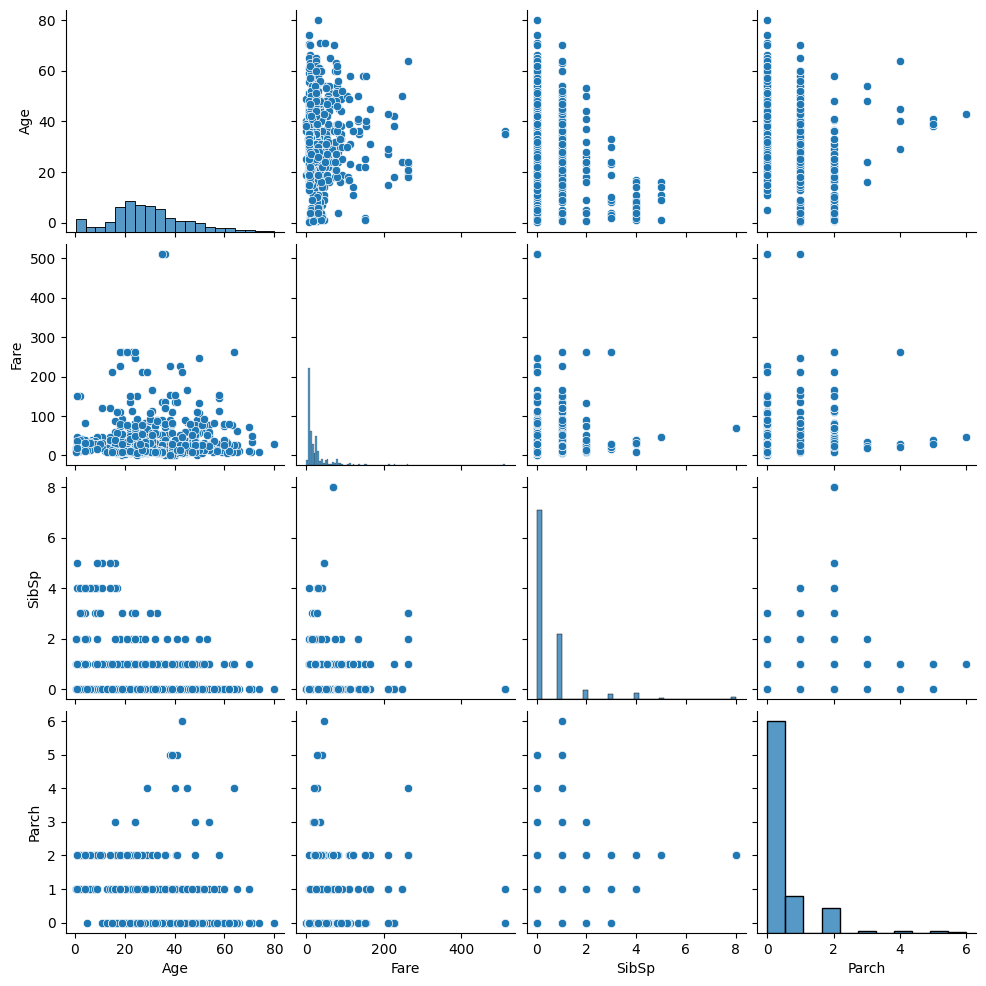

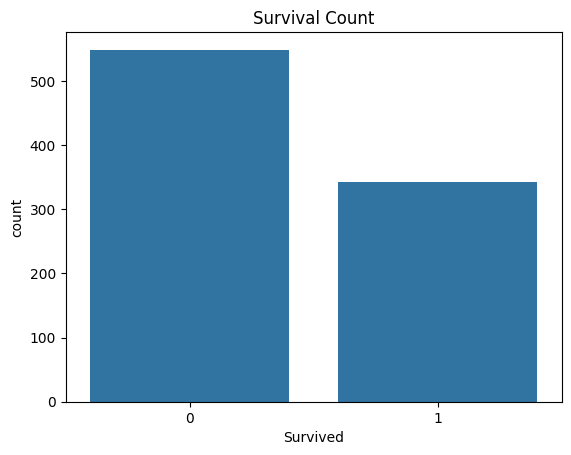

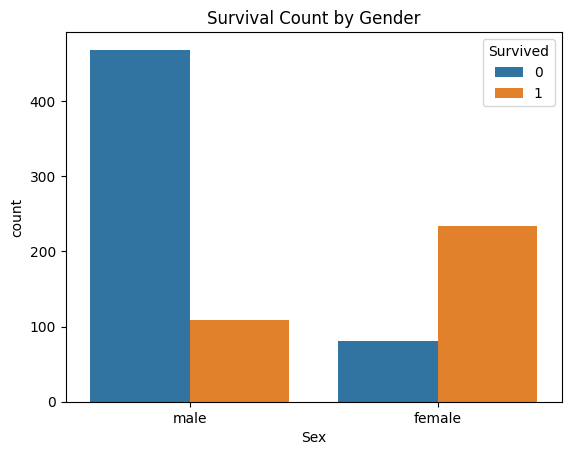

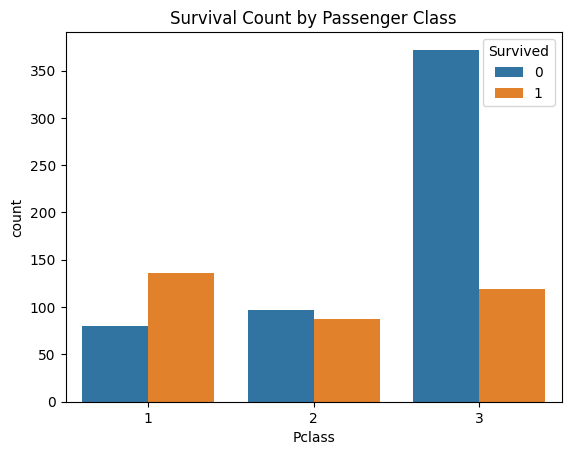

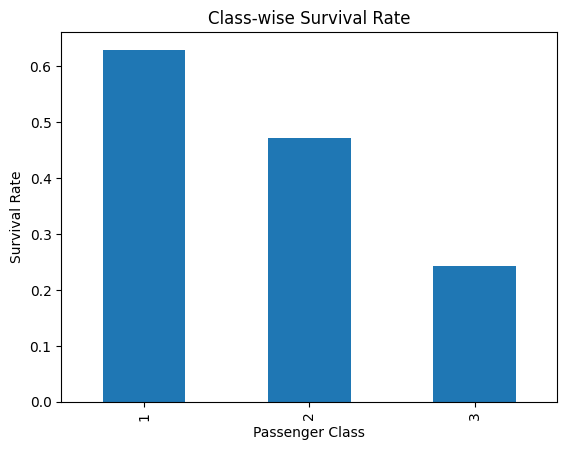

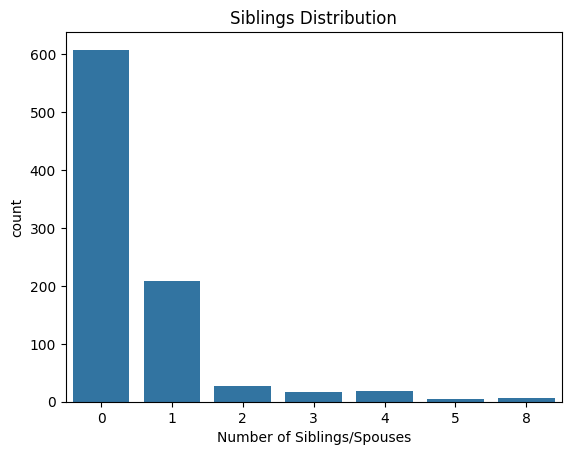

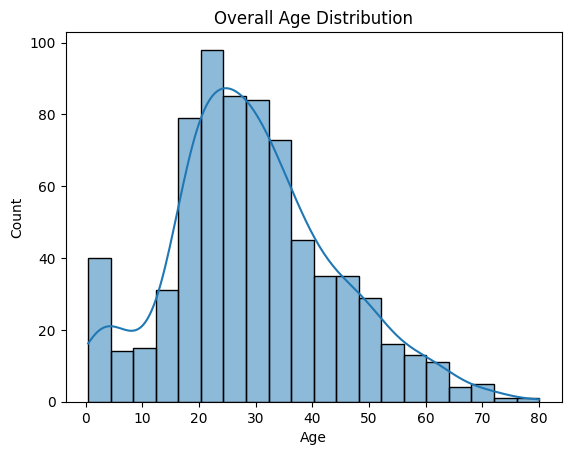

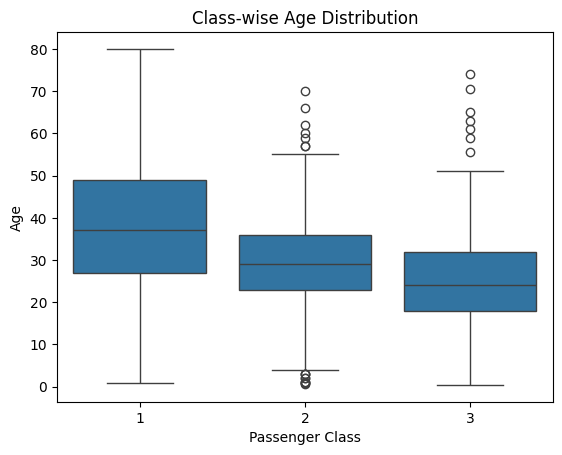

In [ ]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

sns.countplot(x='Survived', data = df)
plt.title('Survival Count')
plt.show()

sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.title('Survival Count by Passenger Class')
plt.show()

class_survival = df.groupby('Pclass')['Survived'].mean()
class_survival.plot(kind = 'bar')
plt.title('Class-wise Survival Rate')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

sns.countplot(x = 'SibSp', data = df)
plt.title('Siblings Distribution')
plt.xlabel('Number of Siblings/Spouses')
plt.show()

sns.histplot(df['Age'].dropna(), bins = 20, kde = True)
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.show()

sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.title('Class-wise Age Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()